In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [78]:
dry = cv2.imread('../Images/Dry03.jpeg')
dry = cv2.cvtColor(dry, cv2.COLOR_BGR2RGB)

wet = cv2.imread('../Images/Wet03.jpeg')
wet = cv2.cvtColor(wet,cv2.COLOR_BGR2RGB)

In [79]:
cv2.imshow("Dry Image", cv2.cvtColor(dry, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [80]:
dry_mat = np.array(dry)
wet_mat = np.array(wet)

In [81]:
dry_red = dry_mat.copy()
dry_red[:,:,1:3] = 0

dry_green = dry_mat.copy()
dry_green[:,:,0:3:2] = 0

dry_blue = dry_mat.copy()
dry_blue[:,:,0:2] = 0

In [82]:
wet_red = wet_mat.copy()
wet_red[:,:,1:3] = 0

wet_green = wet_mat.copy()
wet_green[:,:,0:3:2] = 0

wet_blue = wet_mat.copy()
wet_blue[:,:,0:2] = 0
    

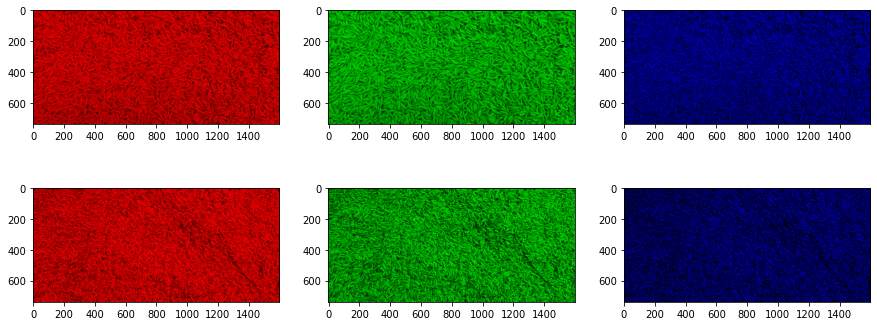

In [83]:
plt.figure(figsize = (15,6))
plt.subplot(231)
plt.imshow(dry_red)
plt.subplot(232)
plt.imshow(dry_green)
plt.subplot(233)
plt.imshow(dry_blue)

plt.subplot(234)
plt.imshow(wet_red)
plt.subplot(235)
plt.imshow(wet_green)
plt.subplot(236)
plt.imshow(wet_blue)

plt.savefig("Extract Color Channel Dry vs Wet.jpg", dpi = 1000)


In [84]:
row_num = 350
dry_df = pd.DataFrame({'Length':np.arange(0,dry_mat.shape[1]), 'Red':dry_red[row_num,:,0], 'Green': dry_green[row_num,:,1], "Blue":dry_blue[row_num,:,2]})
wet_df = pd.DataFrame({'Length':np.arange(0,wet_mat.shape[1]), 'Red':wet_red[row_num,:,0], 'Green': wet_green[row_num,:,1], "Blue":wet_blue[row_num,:,2]})

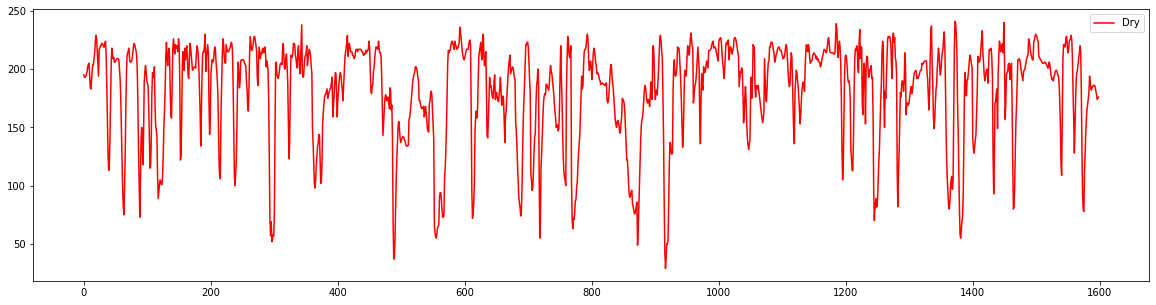

In [85]:
plt.figure(figsize=(20,5))
plt.plot(dry_df['Red'],c='r')
plt.legend(['Dry'])

## Compare

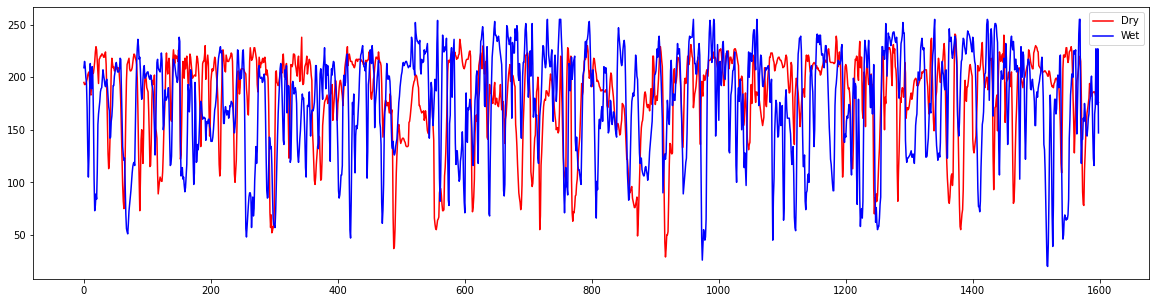

In [86]:
plt.figure(figsize=(20,5))
plt.plot(dry_df['Red'],c='r')
plt.plot(wet_df['Red'],c='b')
plt.legend(['Dry','Wet'])

### Using SMA(Simple Moving Average) 

In [87]:
# 250
dry_df['SMA-250'] = dry_df['Blue'].rolling(250, center=True).mean()

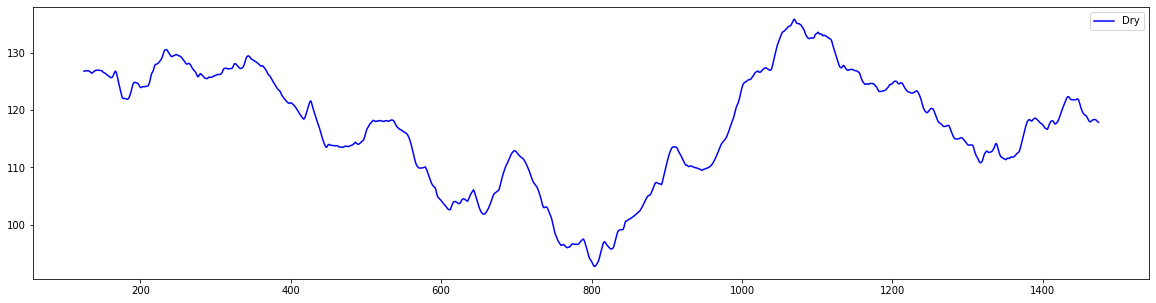

In [88]:
plt.figure(figsize=(20,5))
plt.plot(dry_df['SMA-250'],c='b')
plt.legend(['Dry'])

In [89]:
wet_df['SMA-250'] = wet_df['Blue'].rolling(250, center=True).mean()

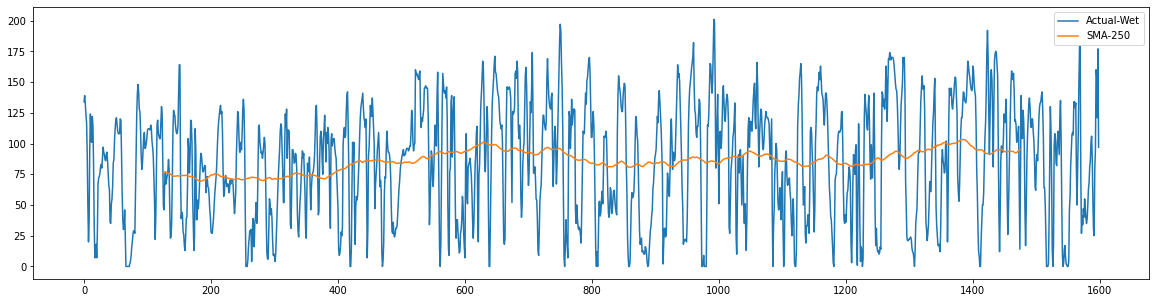

In [90]:
plt.figure(figsize=(20,5))
plt.plot(wet_df['Blue'])
plt.plot(wet_df['SMA-250'])
plt.legend(['Actual-Wet','SMA-250'])
plt.savefig('Wet-blue vs SMA-250.jpg',dpi = 1000)

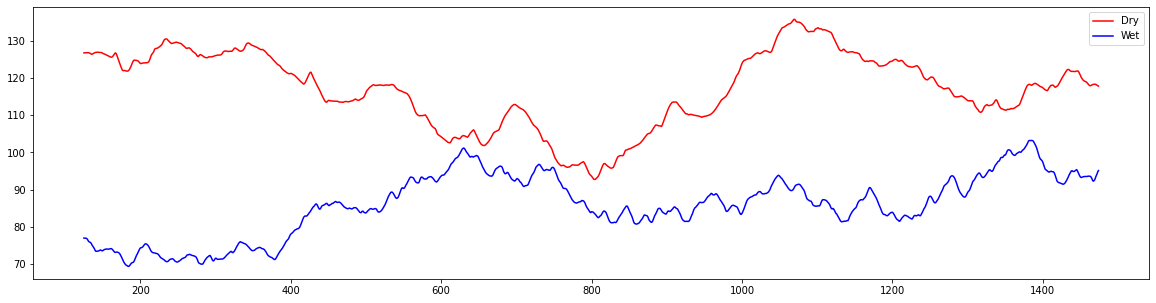

In [91]:
plt.figure(figsize=(20,5))
plt.plot(dry_df['SMA-250'],c='r')
plt.plot(wet_df['SMA-250'],c='b')
plt.legend(['Dry','Wet'])
plt.savefig('Dry Vs Wet SMA-250.jpg',dpi = 1000)